In [1]:
import tensorflow as tf 

In [2]:
from tensorflow import keras 
import matplotlib.pyplot as plt
import numpy as np 

In [3]:
tf.config.experimental.list_physical_devices()

[PhysicalDevice(name='/physical_device:CPU:0', device_type='CPU')]

In [5]:
tf.test.is_built_with_cuda()

False

In [11]:
(x_train, y_train), (x_test, y_test) = keras.datasets.cifar10.load_data()

In [12]:
 x_train.shape

(50000, 32, 32, 3)

In [61]:
x_test.shape

(10000, 32, 32, 3)

In [13]:
#red , green ,  blue 3 channels 

In [15]:
x_train[0].shape

(32, 32, 3)

In [16]:
y_train[0] # --- frog

array([6], dtype=uint8)

In [22]:
def plot_sample(index):
    plt.figure(figsize = (10,2))
    plt.imshow(x_train[index])  # image show 

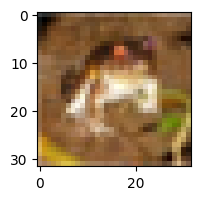

In [23]:
plot_sample(0)

In [24]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]

In [28]:
y_train[0][0]

6

In [29]:
classes[y_train[0][0]]

'frog'

## scale images

In [30]:
## divide by 255 

In [32]:
x_train[0]/255

array([[[0.23137255, 0.24313725, 0.24705882],
        [0.16862745, 0.18039216, 0.17647059],
        [0.19607843, 0.18823529, 0.16862745],
        ...,
        [0.61960784, 0.51764706, 0.42352941],
        [0.59607843, 0.49019608, 0.4       ],
        [0.58039216, 0.48627451, 0.40392157]],

       [[0.0627451 , 0.07843137, 0.07843137],
        [0.        , 0.        , 0.        ],
        [0.07058824, 0.03137255, 0.        ],
        ...,
        [0.48235294, 0.34509804, 0.21568627],
        [0.46666667, 0.3254902 , 0.19607843],
        [0.47843137, 0.34117647, 0.22352941]],

       [[0.09803922, 0.09411765, 0.08235294],
        [0.0627451 , 0.02745098, 0.        ],
        [0.19215686, 0.10588235, 0.03137255],
        ...,
        [0.4627451 , 0.32941176, 0.19607843],
        [0.47058824, 0.32941176, 0.19607843],
        [0.42745098, 0.28627451, 0.16470588]],

       ...,

       [[0.81568627, 0.66666667, 0.37647059],
        [0.78823529, 0.6       , 0.13333333],
        [0.77647059, 0

In [33]:
x_train_scaled = x_train / 255
x_test_scaled = x_test / 255

In [34]:
x_train_scaled.shape

(50000, 32, 32, 3)

In [35]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

In [36]:
## one hot encoding

In [37]:
y_train_categorical = keras.utils.to_categorical(
    y_train , num_classes = 10 ,  dtype = 'float32'
)

In [38]:
y_train_categorical[:5]

array([[0., 0., 0., 0., 0., 0., 1., 0., 0., 0.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 0., 0., 0., 0., 0., 1.],
       [0., 0., 0., 0., 1., 0., 0., 0., 0., 0.],
       [0., 1., 0., 0., 0., 0., 0., 0., 0., 0.]], dtype=float32)

In [42]:
y_train_categorical[0] # instead of value 6 denoting frog we have one in 6th position 

array([0., 0., 0., 0., 0., 0., 1., 0., 0., 0.], dtype=float32)

In [40]:
y_test_categorical = keras.utils.to_categorical(
    y_test , num_classes = 10 , dtype = 'float32'
)

In [41]:
y_test_categorical[0]

array([0., 0., 0., 1., 0., 0., 0., 0., 0., 0.], dtype=float32)

## model buliding

In [43]:
x_train.shape

(50000, 32, 32, 3)

In [44]:
# faltten layer size

32*32*3

3072

In [47]:
model = keras.Sequential([
    keras.layers.Flatten(input_shape=(32,32,3)),
    keras.layers.Dense(3000 , activation="relu"), ### 3000 close to 3072
    keras.layers.Dense(3000 , activation="relu"),
    keras.layers.Dense(10, activation = 'sigmoid') #output layer
])




In [50]:
model.compile(optimizer = 'adam',
             loss= 'categorical_crossentropy',
             metrics =["accuracy"])

In [ ]:
### discrete value use SparseCategoricalCrossentropy

## one hot encoded value CategoricalCrossentropy

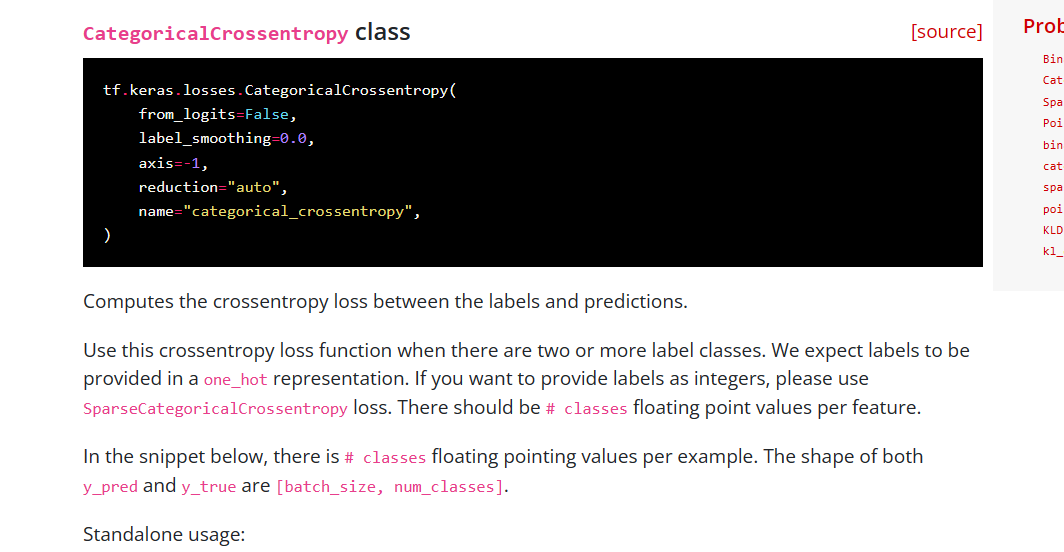

In [52]:
model.fit(x_train_scaled , y_train_categorical , epochs = 2 ) # 50 optimal 

Epoch 1/2
1563/1563 [==============================] - 409s 200ms/step - loss: 1.8871 - accuracy: 0.3250
Epoch 2/2
1563/1563 [==============================] - 293s 188ms/step - loss: 1.6914 - accuracy: 0.3922


In [53]:
model.get_weights()

[array([[-0.01320954,  0.01045475, -0.01286145, ..., -0.00155746,
         -0.00030883, -0.01780842],
        [-0.01116824,  0.01358574,  0.00517338, ..., -0.01038875,
         -0.01627125, -0.00200382],
        [ 0.02717478,  0.00804559, -0.02455028, ..., -0.00181052,
          0.00311036, -0.03498076],
        ...,
        [ 0.0233185 , -0.01710515, -0.00680765, ..., -0.0057227 ,
         -0.01368552, -0.01954985],
        [-0.00958753,  0.00823643, -0.01143526, ...,  0.0229764 ,
          0.0173959 , -0.01396964],
        [-0.0138125 ,  0.01151237, -0.02732856, ..., -0.02774327,
          0.0246491 , -0.02427186]], dtype=float32),
 array([-0.00217677, -0.00454107, -0.00669781, ..., -0.00600074,
        -0.00600335, -0.00590514], dtype=float32),
 array([[ 0.01322803, -0.02792557, -0.02061898, ...,  0.00161274,
          0.01688129, -0.00763894],
        [ 0.01190668, -0.03189462,  0.01980483, ...,  0.03266593,
          0.0020347 ,  0.02316745],
        [-0.00883265,  0.02651297, -0.

In [54]:
predcitions = model.predict(x_test_scaled)

313/313 [==============================] - 56s 30ms/step


In [55]:
predcitions[0]

array([0.5744419 , 0.31877112, 0.5500421 , 0.6306195 , 0.47188917,
       0.54490453, 0.5216332 , 0.12092391, 0.579105  , 0.20835607],
      dtype=float32)

In [57]:
classes[np.argmax(predcitions[0])]

'cat'

In [59]:
classes[y_test[0][0]]

'cat'

In [60]:
model.evaluate(x_test_scaled , y_test_categorical)

313/313 [==============================] - 11s 22ms/step - loss: 1.6180 - accuracy: 0.4201


[1.6179744005203247, 0.42010000348091125]

In [ ]:
%% timeit -n1 -r1

# with tf.device('/CPU:0'):
